In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("Preprocessed ICU data.csv")
df_x  = df.filter(regex="x$", axis = 1)
df_y  = df.filter(regex="y$", axis = 1)
df_mean_x = df_x.filter(like="Mean_")
df_mean_y= df_y.filter(like="Mean_")

df_mean_y








,Mean_Weight.y,Mean_GCS.y,Mean_HR.y,Mean_NIDiasABP.y,Mean_NIMAP.y,Mean_NISysABP.y,Mean_RespRate.y,Mean_Temp.y,Mean_Urine.y,Mean_BUN.y,...,Mean_SaO2.y,Mean_Albumin.y,Mean_ALP.y,Mean_ALT.y,Mean_AST.y,Mean_Bilirubin.y,Mean_Lactate.y,Mean_Cholesterol.y,Mean_TroponinI.y,Mean_TroponinT.y
0,84.600000,15.000000,68.200000,63.750000,82.375417,119.625000,15.000000,36.233333,625.000000,10.0,...,96.462123,4.400000,105.000000,12.000000,15.000000,0.20000,2.08742,156.726974,6.592276,1.025698
1,83.308061,15.000000,70.000000,42.272727,71.317727,129.409091,18.565217,36.640000,64.722222,25.0,...,96.462123,3.300000,104.177403,178.687645,236.484503,1.92985,2.08742,156.726974,6.592276,1.025698
2,114.000000,8.888889,94.880000,70.500000,81.985000,105.000000,19.648290,37.816667,68.888889,16.5,...,98.000000,2.955651,101.000000,52.500000,104.500000,0.40000,2.08742,212.000000,1.300000,1.025698
3,48.400000,9.600000,65.341463,33.523810,55.888571,100.619048,19.648290,36.980000,36.000000,58.0,...,97.000000,1.900000,47.000000,46.000000,82.000000,0.30000,2.05000,156.726974,3.300000,1.025698
4,60.700000,15.000000,125.291667,63.583333,83.443333,123.166667,34.500000,36.760000,250.000000,23.0,...,96.462123,2.955651,104.177403,178.687645,236.484503,1.92985,2.08742,156.726974,6.592276,1.025698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,64.000000,10.777778,85.833333,61.166667,87.071667,138.888889,19.555556,36.825000,159.062500,14.0,...,96.462123,3.600000,104.177403,178.687645,236.484503,1.92985,2.08742,156.726974,6.592276,1.025698
1470,53.000000,14.666667,77.869565,45.750000,71.499500,123.000000,19.648290,36.716667,71.545455,69.0,...,96.462123,2.600000,155.000000,28.000000,35.000000,0.90000,2.08742,156.726974,6.592276,1.025698
1471,75.000000,10.000000,102.458333,57.441366,76.579340,117.843210,19.648290,37.250000,154.583333,15.0,...,98.000000,2.955651,104.177403,178.687645,236.484503,1.92985,2.08742,156.726974,6.592276,1.025698
1472,87.000000,14.750000,97.642857,68.100000,85.967000,121.700000,19.648290,37.185714,45.318182,18.0,...,96.462123,2.955651,104.177403,178.687645,236.484503,1.92985,1.10000,156.726974,6.592276,1.025698


In [33]:
final_keep_y = ["Mean_GCS.y", "Mean_Temp.y", "Mean_PaCO2.y", "Mean_BUN.y", "Mean_WBC.y", "Mean_HR.y", "Mean_Glucose.y", "Mean_Urine.y", "Mean_Platelets.y", "Mean_HCO3.y"]
final_keep_x = ["Mean_GCS.x", "Mean_Temp.x", "Mean_PaCO2.x", "Mean_BUN.x", "Mean_WBC.x", "Mean_HR.x", "Mean_Glucose.x", "Mean_SysABP.x", "Mean_Urine.x", "Mean_Platelets.x", "Mean_HCO3.x"]


# df_x_final = df_mean_x[final_keep_x]
# df_y_final = df_mean_y[final_keep_y]



## X model 

In [34]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler   # or RobustScaler for heavy tails
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

final_keep_x = ["Mean_GCS.x", "Mean_Temp.x", "Mean_PaCO2.x", "Mean_BUN.x", "Mean_WBC.x", "Mean_HR.x", "Mean_Glucose.x", "Mean_SysABP.x", "Mean_Urine.x", "Mean_Platelets.x", "Mean_HCO3.x"]

X = df_mean_x[final_keep_x].copy()

# 2) Mark outliers as NaN (here: |z| > 3). You can tighten/loosen this threshold.
z = (X - X.mean()) / X.std(ddof=0)
outlier_mask = z.abs() > 3
X_masked = X.mask(outlier_mask)

print("Cells flagged as outliers:", int(outlier_mask.sum().sum()))

# 3) Scale → KNN impute (distance works better when features are on the same scale)
pipe = Pipeline([
    ("scaler", StandardScaler()),             # use RobustScaler() if distributions are very skewed
    ("imputer", KNNImputer(n_neighbors=5, weights="distance"))
])

X_imputed_scaled = pipe.fit_transform(X_masked)          # imputed in scaled space
X_imputed = pipe.named_steps["scaler"].inverse_transform(X_imputed_scaled)  # back to original units

# 4) Put the cleaned values back
df_x_final = df_mean_x.copy()
df_x_final[final_keep_x] = X_imputed


Cells flagged as outliers: 190


In [35]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import pandas as pd
import numpy as np


# --- 1️⃣ Split the data ---
X = df_x_final
y = df["In.hospital_death"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- 2️⃣ Rebuild model with best params ---
best_params = {
    'bootstrap': True,
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 800
}

rf_best = RandomForestClassifier(
    **best_params,
    random_state=42,
    class_weight="balanced"   # Optional: helps if classes are imbalanced
)

# --- 3️⃣ Train the model ---
rf_best.fit(X_train1, y_train1)

# --- 4️⃣ Get predicted probabilities ---
y_prob1 = rf_best.predict_proba(X_test1)[:, 1]

# --- 5️⃣ Use your best threshold for classification ---
best_threshold = 0.4534867988694888
y_pred1 = (y_prob1 >= best_threshold).astype(int)

# --- 6️⃣ Evaluate ---
print("Using threshold:", best_threshold)
print("Accuracy :", round(accuracy_score(y_test1, y_pred1), 3))
print("Recall   :", round(recall_score(y_test1, y_pred1), 3))
print("Precision:", round(precision_score(y_test1, y_pred1), 3))
print("F1 Score :", round(f1_score(y_test1, y_pred1), 3))
print("ROC AUC  :", round(roc_auc_score(y_test1, y_prob1), 3))  # AUC always uses probabilities

print("\nClassification Report:\n", classification_report(y_test1, y_pred1, digits=3))


Using threshold: 0.4534867988694888
Accuracy : 0.702
Recall   : 0.694
Precision: 0.588
F1 Score : 0.636
ROC AUC  : 0.776

Classification Report:
               precision    recall  f1-score   support

           0      0.793     0.707     0.747       184
           1      0.588     0.694     0.636       111

    accuracy                          0.702       295
   macro avg      0.690     0.700     0.692       295
weighted avg      0.716     0.702     0.705       295



## Y model

In [36]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler   # or RobustScaler for heavy tails
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

final_keep_y = ["Mean_GCS.y", "Mean_Temp.y", "Mean_PaCO2.y", "Mean_BUN.y", "Mean_WBC.y", "Mean_HR.y", "Mean_Glucose.y", "Mean_Urine.y", "Mean_Platelets.y", "Mean_HCO3.y"]

X = df_mean_y[final_keep_y].copy()

# 2) Mark outliers as NaN (here: |z| > 3). You can tighten/loosen this threshold.
z = (X - X.mean()) / X.std(ddof=0)
outlier_mask = z.abs() > 3
X_masked = X.mask(outlier_mask)

print("Cells flagged as outliers:", int(outlier_mask.sum().sum()))

# 3) Scale → KNN impute (distance works better when features are on the same scale)
pipe = Pipeline([
    ("scaler", StandardScaler()),             # use RobustScaler() if distributions are very skewed
    ("imputer", KNNImputer(n_neighbors=5, weights="distance"))
])

X_imputed_scaled = pipe.fit_transform(X_masked)          # imputed in scaled space
X_imputed = pipe.named_steps["scaler"].inverse_transform(X_imputed_scaled)  # back to original units

# 4) Put the cleaned values back
df_y_final = df_mean_y.copy()
df_y_final[final_keep_y] = X_imputed


Cells flagged as outliers: 151


In [37]:


# --- 1️⃣ Split the data ---
X = df_y_final
y = df["In.hospital_death"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- 2️⃣ Rebuild model with best params ---
best_params = {
    'bootstrap': True,
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 800
}

rf_best = RandomForestClassifier(
    **best_params,
    random_state=42,
    class_weight="balanced"   # Optional: helps if classes are imbalanced
)

# --- 3️⃣ Train the model ---
rf_best.fit(X_train2, y_train2)

# --- 4️⃣ Get predicted probabilities ---
y_prob2 = rf_best.predict_proba(X_test2)[:, 1]

# --- 5️⃣ Use your best threshold for classification ---
best_threshold = 0.4025322696760549

y_pred2 = (y_prob2 >= best_threshold).astype(int)

# --- 6️⃣ Evaluate ---
print("Using threshold:", best_threshold)
print("Accuracy :", round(accuracy_score(y_test2, y_pred2), 3))
print("Recall   :", round(recall_score(y_test2, y_pred2), 3))
print("Precision:", round(precision_score(y_test2, y_pred2), 3))
print("F1 Score :", round(f1_score(y_test2, y_pred2), 3))
print("ROC AUC  :", round(roc_auc_score(y_test2, y_prob2), 3))  # AUC always uses probabilities

print("\nClassification Report:\n", classification_report(y_test2, y_pred2, digits=3))


Using threshold: 0.4025322696760549
Accuracy : 0.719
Recall   : 0.838
Precision: 0.589
F1 Score : 0.691
ROC AUC  : 0.805

Classification Report:
               precision    recall  f1-score   support

           0      0.869     0.647     0.741       184
           1      0.589     0.838     0.691       111

    accuracy                          0.719       295
   macro avg      0.729     0.742     0.716       295
weighted avg      0.763     0.719     0.723       295



In [38]:
X_test1

,Mean_Weight.x,Mean_GCS.x,Mean_HR.x,Mean_NIDiasABP.x,Mean_NIMAP.x,Mean_NISysABP.x,Mean_RespRate.x,Mean_Temp.x,Mean_Urine.x,Mean_BUN.x,...,Mean_SaO2.x,Mean_Albumin.x,Mean_ALP.x,Mean_ALT.x,Mean_AST.x,Mean_Bilirubin.x,Mean_Lactate.x,Mean_Cholesterol.x,Mean_TroponinI.x,Mean_TroponinT.x
1248,87.700000,12.200000,87.483871,52.366667,68.189333,99.833333,19.666415,37.560000,77.500000,20.000000,...,96.50000,2.983815,105.170986,165.109754,238.525354,1.881972,1.200000,156.569079,7.17187,1.098319
435,49.947170,11.333333,74.545455,65.156250,101.656250,174.656250,18.333333,37.120000,206.666667,14.000000,...,97.00000,2.983815,105.170986,165.109754,238.525354,1.881972,1.000000,156.569079,11.60000,1.098319
266,80.000000,3.000000,87.392857,75.250000,94.500000,157.250000,19.666415,37.416667,85.714286,16.000000,...,98.00000,3.000000,53.000000,57.000000,58.000000,0.500000,2.200000,156.569079,7.17187,0.090000
104,118.400000,3.250000,123.706897,38.736842,51.736842,90.368421,19.666415,36.700000,7.529412,60.333333,...,96.00000,2.400000,329.000000,2221.666667,5866.666667,7.133333,14.185714,156.569079,7.17187,0.120000
680,92.363636,8.333333,104.500000,57.213827,75.982764,116.454270,19.666415,36.723684,266.800000,24.666667,...,98.00000,3.350000,109.500000,1806.500000,5350.750000,7.875000,12.450000,156.569079,7.17187,1.098319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,86.200000,15.000000,69.760000,43.920000,69.160000,119.640000,21.360000,36.776923,195.250000,88.000000,...,96.66875,2.983815,105.170986,165.109754,238.525354,1.881972,2.413805,199.000000,7.17187,0.505000
1245,73.000000,15.000000,99.800000,45.304348,69.521739,117.956522,26.566667,37.071429,35.045455,20.666667,...,96.66875,2.100000,309.666667,87.000000,33.000000,5.100000,1.100000,156.569079,7.17187,1.098319
3,48.400000,13.250000,78.125000,28.000000,54.499545,107.500000,19.666415,37.133333,51.210526,69.000000,...,95.50000,1.900000,47.000000,46.000000,82.000000,0.300000,1.500000,156.569079,3.30000,1.098319
1098,57.190909,10.000000,85.818182,49.553191,66.795532,101.276596,19.666415,37.116667,206.000000,13.000000,...,96.66875,3.200000,105.170986,165.109754,238.525354,1.881972,0.900000,156.569079,7.17187,0.010000


In [39]:
X_test2

,Mean_Weight.y,Mean_GCS.y,Mean_HR.y,Mean_NIDiasABP.y,Mean_NIMAP.y,Mean_NISysABP.y,Mean_RespRate.y,Mean_Temp.y,Mean_Urine.y,Mean_BUN.y,...,Mean_SaO2.y,Mean_Albumin.y,Mean_ALP.y,Mean_ALT.y,Mean_AST.y,Mean_Bilirubin.y,Mean_Lactate.y,Mean_Cholesterol.y,Mean_TroponinI.y,Mean_TroponinT.y
1248,87.700000,13.833333,97.739130,60.000000,79.330000,118.000000,19.648290,37.216667,92.500000,15.0,...,94.500000,2.955651,104.177403,178.687645,236.484503,1.929850,1.20000,156.726974,6.592276,1.025698
435,49.200000,11.307692,94.693878,67.390244,101.025854,168.317073,19.909091,36.850000,316.500000,15.0,...,97.000000,2.955651,104.177403,178.687645,236.484503,1.929850,1.00000,156.726974,11.600000,1.025698
266,80.000000,6.000000,93.000000,75.250000,94.500000,157.250000,19.648290,38.457143,201.428571,13.0,...,97.000000,3.000000,53.000000,57.000000,58.000000,0.500000,2.20000,156.726974,6.592276,0.090000
104,118.400000,3.000000,120.603774,38.736842,51.736842,90.368421,19.648290,35.060000,19.500000,45.0,...,89.500000,2.600000,1749.333333,7632.666667,14773.333333,11.166667,22.50000,156.726974,6.592276,0.080000
680,93.525424,8.888889,108.375000,57.441366,76.579340,117.843210,19.648290,36.540625,52.181818,34.5,...,98.000000,3.350000,124.666667,1348.666667,3022.000000,9.966667,6.20000,156.726974,6.592276,1.025698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,86.200000,15.000000,56.909091,40.363636,70.742273,131.500000,23.045455,36.820000,215.000000,83.5,...,96.462123,2.955651,104.177403,178.687645,236.484503,1.929850,2.08742,199.000000,6.592276,0.505000
1245,73.000000,15.000000,86.307692,45.304348,69.521739,117.956522,20.115385,36.457143,30.272727,24.0,...,96.462123,2.100000,276.000000,65.000000,26.000000,5.300000,1.60000,156.726974,6.592276,1.025698
3,48.400000,9.600000,65.341463,33.523810,55.888571,100.619048,19.648290,36.980000,36.000000,58.0,...,97.000000,1.900000,47.000000,46.000000,82.000000,0.300000,2.05000,156.726974,3.300000,1.025698
1098,57.471875,10.000000,95.120000,49.553191,66.795532,101.276596,19.648290,36.933333,59.722222,12.0,...,96.462123,3.200000,104.177403,178.687645,236.484503,1.929850,0.90000,156.726974,6.592276,0.010000


In [40]:
# Create a NumPy array combining results
results_x = np.column_stack((y_prob1, y_pred1, y_test1.to_numpy()))

# Optionally, create a Pandas DataFrame for better readability
results_x_df = pd.DataFrame(
    results_x,
    columns=["Predicted_Prob", "Predicted_Label", "Actual_Label"]
)

print(results_x_df.head(10))


   Predicted_Prob  Predicted_Label  Actual_Label
0        0.271363              0.0           0.0
1        0.356229              0.0           0.0
2        0.689790              1.0           1.0
3        0.853663              1.0           1.0
4        0.589579              1.0           1.0
5        0.323510              0.0           0.0
6        0.528699              1.0           0.0
7        0.369126              0.0           0.0
8        0.557410              1.0           0.0
9        0.535585              1.0           1.0


In [41]:
# Create a NumPy array combining results
results_y = np.column_stack((y_prob2, y_pred2, y_test2.to_numpy()))

# Optionally, create a Pandas DataFrame
results_y_df = pd.DataFrame(
    results_y,
    columns=["Predicted_Prob", "Predicted_Label", "Actual_Label"]
)

print(results_y_df.head(10))


   Predicted_Prob  Predicted_Label  Actual_Label
0        0.240194              0.0           0.0
1        0.324589              0.0           0.0
2        0.657378              1.0           1.0
3        0.869817              1.0           1.0
4        0.685745              1.0           1.0
5        0.345142              0.0           0.0
6        0.415307              1.0           0.0
7        0.233269              0.0           0.0
8        0.586101              1.0           0.0
9        0.366126              0.0           1.0


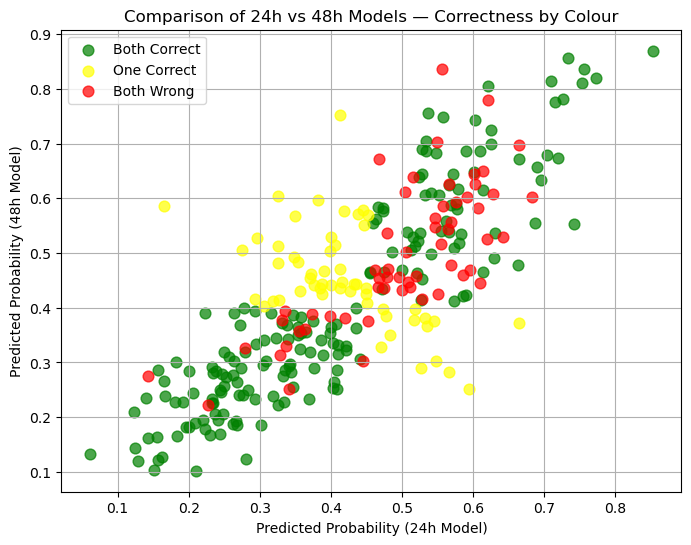

In [42]:
# Create a combined comparison DataFrame
comparison_df = pd.DataFrame({
    "prob_x": y_prob1,          # predicted probability from 24h model
    "pred_x": y_pred1,          # predicted class from 24h model
    "prob_y": y_prob2,          # predicted probability from 48h model
    "pred_y": y_pred2,          # predicted class from 48h model
    "actual": y_test1.to_numpy()   # actual label (same for both models)
})

# Determine correctness for each model
correct_x = (comparison_df["pred_x"] == comparison_df["actual"])
correct_y = (comparison_df["pred_y"] == comparison_df["actual"])

# Define colour logic
comparison_df["color"] = np.where(
    (correct_x & correct_y), "green",       # both correct
    np.where((~correct_x & ~correct_y), "red", "yellow")  # both wrong else mixed
)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for color, label in [("green", "Both Correct"), ("yellow", "One Correct"), ("red", "Both Wrong")]:
    subset = comparison_df[comparison_df["color"] == color]
    plt.scatter(subset["prob_x"], subset["prob_y"], color=color, label=label, alpha=0.7, s=60)

plt.xlabel("Predicted Probability (24h Model)")
plt.ylabel("Predicted Probability (48h Model)")
plt.title("Comparison of 24h vs 48h Models — Correctness by Colour")
plt.legend()
plt.grid(True)
plt.show()


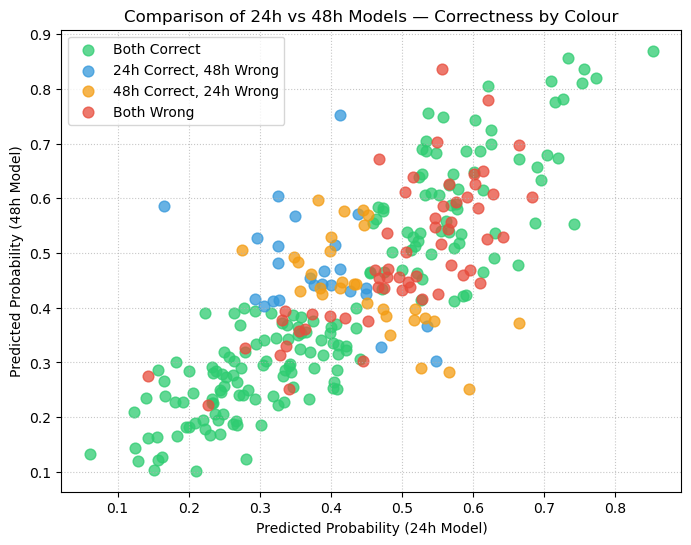

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# --- Define correctness for each model ---
correct_x = (comparison_df["pred_x"] == comparison_df["actual"])
correct_y = (comparison_df["pred_y"] == comparison_df["actual"])

# --- Assign colors based on correctness ---
comparison_df["color"] = np.select(
    [
        correct_x & correct_y,          # both correct
        ~correct_x & ~correct_y,        # both wrong
        correct_x & ~correct_y,         # 24h right, 48h wrong
        ~correct_x & correct_y          # 48h right, 24h wrong
    ],
    [
        "#2ecc71",   # green
        "#e74c3c",   # red
        "#3498db",   # blue (24h correct, 48h wrong)
        "#f39c12"    # orange (48h correct, 24h wrong)
    ],
    default="gray"
)

# --- Plot scatter ---
plt.figure(figsize=(8,6))
for color, label in [
    ("#2ecc71", "Both Correct"),
    ("#3498db", "24h Correct, 48h Wrong"),
    ("#f39c12", "48h Correct, 24h Wrong"),
    ("#e74c3c", "Both Wrong")
]:
    subset = comparison_df[comparison_df["color"] == color]
    plt.scatter(subset["prob_x"], subset["prob_y"], color=color, label=label, alpha=0.75, s=60)

# Diagonal reference line

plt.xlabel("Predicted Probability (24h Model)")
plt.ylabel("Predicted Probability (48h Model)")
plt.title("Comparison of 24h vs 48h Models — Correctness by Colour")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.7)
plt.show()
